In [1]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
#from skimage.transform import resize   # for resizing images

Using TensorFlow backend.


In [2]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [3]:
count

298

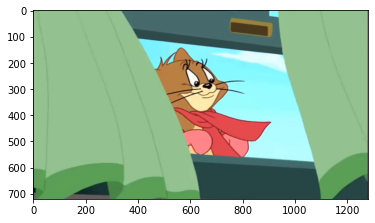

In [4]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)

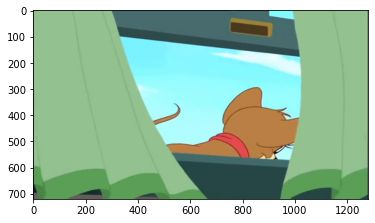

In [5]:
img = plt.imread('frame1.jpg')   # reading image using its name
plt.imshow(img)

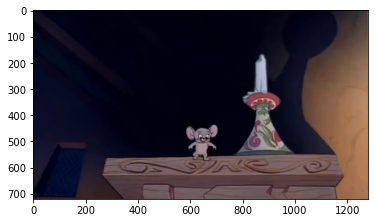

In [6]:
img = plt.imread('frame189.jpg')   # reading image using its name
plt.imshow(img)

In [8]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data    # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2
...,...,...
293,frame293.jpg,0
294,frame294.jpg,0
295,frame295.jpg,0
296,frame296.jpg,0


In [9]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [10]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [11]:
from skimage.transform import resize

In [12]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [13]:
#now here all images have been reshaped to 224 X 224 X 3

In [14]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [16]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [17]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [18]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)

In [19]:
X_train.shape

(208, 7, 7, 512)

In [20]:
X_valid.shape

(90, 7, 7, 512)

In [21]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [22]:
X_train.max() 

11.078999

In [23]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [24]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


model.fit(train, y_train, epochs=10, 
          validation_data=(X_valid, y_valid))

Train on 208 samples, validate on 90 samples
Epoch 1/10
208/208 [==============================] - 5s 23ms/step - loss: 0.9804 - accuracy: 0.5721 - val_loss: 0.8970 - val_accuracy: 0.6778
Epoch 2/10
208/208 [==============================] - 4s 20ms/step - loss: 0.4339 - accuracy: 0.8606 - val_loss: 0.6570 - val_accuracy: 0.7333
Epoch 3/10
208/208 [==============================] - 4s 20ms/step - loss: 0.2512 - accuracy: 0.8990 - val_loss: 0.4482 - val_accuracy: 0.8222
Epoch 4/10
208/208 [==============================] - 4s 19ms/step - loss: 0.1697 - accuracy: 0.9375 - val_loss: 0.3727 - val_accuracy: 0.8111
Epoch 5/10
208/208 [==============================] - 4s 19ms/step - loss: 0.0848 - accuracy: 0.9760 - val_loss: 0.4409 - val_accuracy: 0.8000
Epoch 6/10
208/208 [==============================] - 4s 19ms/step - loss: 0.0467 - accuracy: 0.9952 - val_loss: 0.3646 - val_accuracy: 0.8444
Epoch 7/10
208/208 [==============================] - 4s 19ms/step - loss: 0.0405 - accuracy: 0.9

In [26]:
test_loss, test_acc = model.evaluate(train, y_train, verbose=2)
print("Accuracy of the model is",test_acc*100)

Accuracy of the model is 99.5192289352417


In [27]:
#calculate screen time

In [28]:
count = 0
videoFile = "Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [30]:
test = pd.read_csv('test.csv')

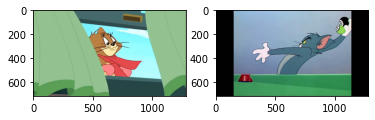

In [31]:
img1 = plt.imread('frame0.jpg')   # reading image using its name
img2=plt.imread('test0.jpg')
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

In [32]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [33]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)


In [34]:
test_image = preprocess_input(test_image, mode='tf')
# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [35]:
predictions = model.predict_classes(test_image)

In [36]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 5 seconds
The screen time of TOM is 120 seconds
